### Определение

Пусть $$Y_1, Y_2$$ — две независимые случайные величины, имеющие распределение хи-квадрат:  
$$
Y_i \sim \chi^2(k_i), \quad k_i \in \mathbb{N}, \quad i = 1, 2.
$$  
Тогда распределение случайной величины  
$$
F = \frac{Y_1 / k_1}{Y_2 / k_2}
$$ 
называется **распределением Фишера (распределением Снедекора)** со степенями свободы $$ k_1  и  k_2 $$.  
Пишут:  
$$
F \sim F(k_1, k_2).
$$

---

### Плотность вероятности F-распределения имеет вид:  

$$
\varphi(x) = \frac{\Gamma\left(\frac{k_1 + k_2}{2}\right) k_1^{\frac{k_1}{2}} k_2^{\frac{k_2}{2}}}{\Gamma\left(\frac{k_1}{2}\right) \Gamma\left(\frac{k_2}{2}\right)} x^{\frac{k_1-1}{2}} \left(k_1 x + k_2\right)^{-\frac{k_1 + k_2}{2}}, \quad x > 0.
$$

где $$\Gamma(y)$$ — гамма-функция Эйлера в точке y.

---

### Моменты

Математическое ожидание и дисперсия случайной величины, имеющей распределение Фишера:

$$
\mathbb{E}[F] = \frac{k_2}{k_2 - 2}, \quad \text{если } k_2 > 2,
$$  
$$
\operatorname{D}[F] = \frac{2 k_2^2 (k_1 + k_2 - 2)}{k_1 (k_2 - 2)^2 (k_2 - 4)}, \quad \text{если } k_2 > 4.
$$

---

### Свойства распределения Фишера

- Если $$ F \sim F(k_1, k_2) $$, то  
  $$
  \frac{1}{F} \sim F(k_2, k_1).
  $$

- Распределение Фишера сходится к единице:  
  Если $$ F_{k_1, k_2} \sim F(k_1, k_2) $$, то  
  $$
  F_{k_1, k_2} \xrightarrow{d} \delta(x - 1)
  $$  
  при $$ k_1, k_2 \to \infty $$, где $$ \delta(x - 1) $$ — дельта-функция в точке $$ x = 1 $$, соответствующая распределению случайной величины-константы $$ X \equiv 1 $$.


ИССЛЕДОВАНИЕ РАСПРЕДЕЛЕНИЯ ФИШЕРА-СНЕДЕКОРА

1. Пример плотности при dfn=5, dfd=10:


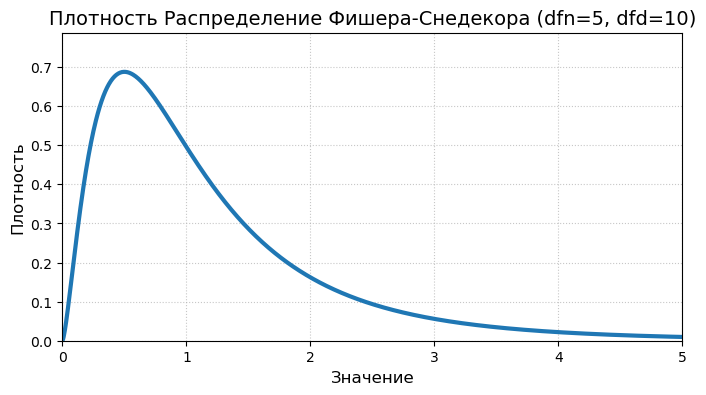


2. Интерактивное исследование плотности (используйте слайдеры):



3. Сравнение гистограммы и плотности для dfn=8, dfd=12:


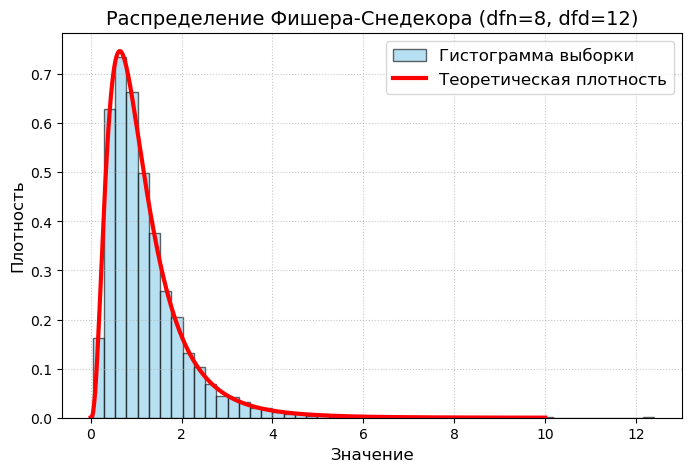

Выборочное среднее: 1.2013
Теоретическое среднее: 1.2000
Выборочная дисперсия: 0.7953
Теоретическая дисперсия: 0.8100
Относительная ошибка среднего: 0.11%
Относительная ошибка дисперсии: 1.81%

4. Плотности при разных dfd (фиксированный dfn=5):


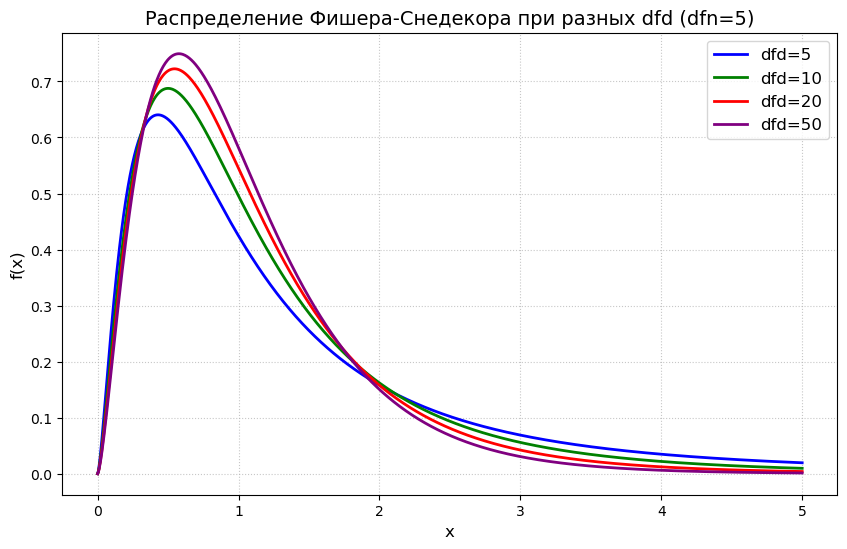


5. Плотности при разных dfn (фиксированный dfd=10):


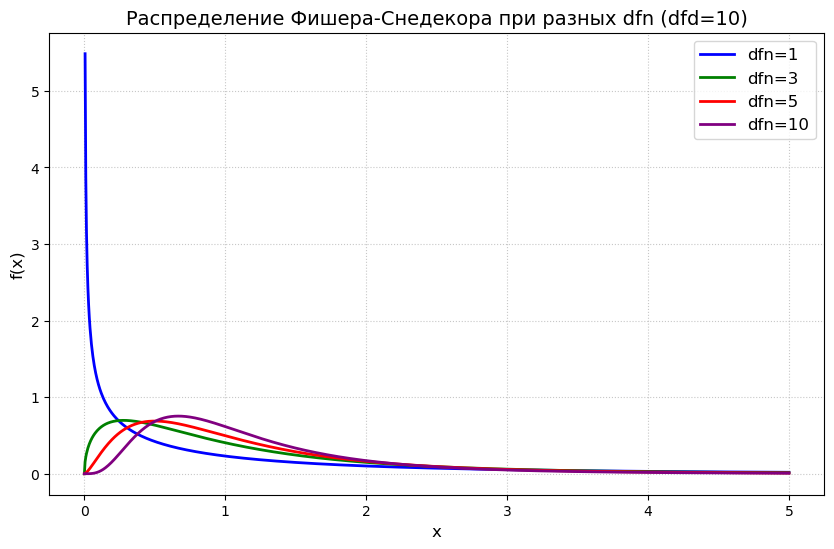


6. Сравнение F-распределения и распределения хи-квадрат:


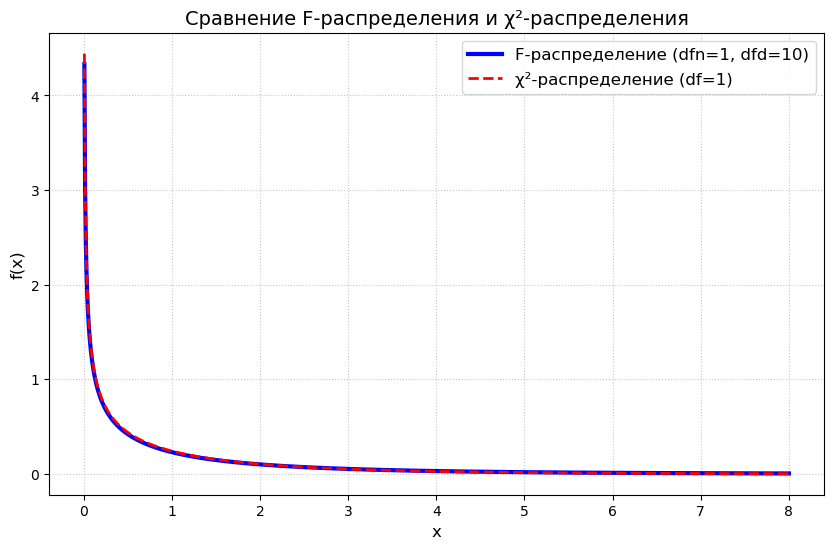


Для интерактивного исследования используйте виджет ниже:


interactive(children=(IntSlider(value=100, description='Сетка', max=500, min=50, step=50), FloatSlider(value=5…

In [ ]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive, FloatSlider, IntSlider, fixed

# Вспомогательная функция для отрисовки плотности
def show_pdf(pdf, xmin, xmax, grid_size, distr_name, **kwargs):
    X = np.linspace(xmin, xmax, grid_size)
    Y = pdf(X, **kwargs)
    ymax = max(Y) + 0.1 if max(Y) < np.inf else 10  # ограничение для бесконечных значений
    
    plt.figure(figsize=(8, 4))
    plt.plot(X, Y, lw=3)
    plt.grid(ls=':', alpha=0.7)
    plt.xlabel('Значение', fontsize=12)
    plt.ylabel('Плотность', fontsize=12)
    plt.xlim((xmin, xmax))
    plt.ylim((0, ymax))
    title = f'Плотность {distr_name}'.format(**kwargs)
    plt.title(title, fontsize=14)
    plt.show()

# Функция для генерации выборки и сравнения с плотностью
def plot_f_distribution(dfn, dfd, n_points=10000):
    # Генерация выборки
    sample = sts.f.rvs(dfn=dfn, dfd=dfd, size=n_points)
    
    # Теоретические моменты
    if dfd > 2:
        mean_theory = dfd / (dfd - 2)  # математическое ожидание для F-распределения
    else:
        mean_theory = np.nan
    
    if dfd > 4:
        var_theory = (2 * dfd**2 * (dfn + dfd - 2)) / (dfn * (dfd - 2)**2 * (dfd - 4))
    else:
        var_theory = np.nan
    
    # Границы для графика
    x_min = 0
    x_max = min(max(sample) * 1.1, 10)  # ограничиваем для лучшей визуализации
    
    # Построение
    plt.figure(figsize=(8, 5))
    plt.hist(sample, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Гистограмма выборки')
    
    grid = np.linspace(x_min, x_max, 1000)
    pdf_vals = sts.f.pdf(grid, dfn=dfn, dfd=dfd)
    plt.plot(grid, pdf_vals, 'r-', lw=3, label='Теоретическая плотность')
    
    plt.title(f'Распределение Фишера-Снедекора (dfn={dfn}, dfd={dfd})', fontsize=14)
    plt.xlabel('Значение', fontsize=12)
    plt.ylabel('Плотность', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(ls=':', alpha=0.7)
    plt.show()
    
    # Вывод статистик
    print(f'Выборочное среднее: {sample.mean():.4f}')
    print(f'Теоретическое среднее: {mean_theory:.4f}')
    print(f'Выборочная дисперсия: {sample.var():.4f}')
    print(f'Теоретическая дисперсия: {var_theory:.4f}')
    
    # Расчет и вывод ошибок
    if not np.isnan(mean_theory):
        mean_error = abs(sample.mean() - mean_theory) / abs(mean_theory) * 100
        print(f'Относительная ошибка среднего: {mean_error:.2f}%')
    
    if not np.isnan(var_theory):
        var_error = abs(sample.var() - var_theory) / var_theory * 100
        print(f'Относительная ошибка дисперсии: {var_error:.2f}%')

# Исследование зависимости плотности от параметров
print("="*60)
print("ИССЛЕДОВАНИЕ РАСПРЕДЕЛЕНИЯ ФИШЕРА-СНЕДЕКОРА")
print("="*60)

# Пример 1: фиксированные параметры
print("\n1. Пример плотности при dfn=5, dfd=10:")
show_pdf(pdf=sts.f.pdf, xmin=0, xmax=5, grid_size=1000,
         distr_name='Распределение Фишера-Снедекора (dfn=5, dfd=10)', 
         dfn=5, dfd=10)

# Интерактивное исследование
print("\n2. Интерактивное исследование плотности (используйте слайдеры):")
def interactive_f_distribution(grid_size=100, xmax=5, dfn=5, dfd=10):
    show_pdf(pdf=sts.f.pdf, xmin=0, xmax=xmax, grid_size=grid_size,
             distr_name=f'Распределение Фишера-Снедекора (dfn={dfn:.1f}, dfd={dfd:.1f})',
             dfn=dfn, dfd=dfd)

interactive_plot = interactive(interactive_f_distribution,
                               grid_size=IntSlider(min=50, max=500, step=50, value=100, description='Сетка'),
                               xmax=FloatSlider(min=1, max=10, step=0.5, value=5, description='x_max'),
                               dfn=FloatSlider(min=1, max=20, step=1, value=5, description='dfn'),
                               dfd=FloatSlider(min=1, max=20, step=1, value=10, description='dfd'))

# Сравнение гистограммы и плотности
print("\n3. Сравнение гистограммы и плотности для dfn=8, dfd=12:")
plot_f_distribution(dfn=8, dfd=12, n_points=5000)

# Исследование при разных параметрах dfd (фиксированный dfn)
print("\n4. Плотности при разных dfd (фиксированный dfn=5):")
plt.figure(figsize=(10, 6))
dfds = [5, 10, 20, 50]
colors = ['blue', 'green', 'red', 'purple']
x = np.linspace(0, 5, 1000)

for dfd, color in zip(dfds, colors):
    pdf = sts.f.pdf(x, dfn=5, dfd=dfd)
    plt.plot(x, pdf, color=color, lw=2, label=f'dfd={dfd}')
    
plt.title('Распределение Фишера-Снедекора при разных dfd (dfn=5)', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(ls=':', alpha=0.7)
plt.show()

# Исследование при разных параметрах dfn (фиксированный dfd)
print("\n5. Плотности при разных dfn (фиксированный dfd=10):")
plt.figure(figsize=(10, 6))
dfns = [1, 3, 5, 10]
colors = ['blue', 'green', 'red', 'purple']
x = np.linspace(0, 5, 1000)

for dfn, color in zip(dfns, colors):
    pdf = sts.f.pdf(x, dfn=dfn, dfd=10)
    plt.plot(x, pdf, color=color, lw=2, label=f'dfn={dfn}')
    
plt.title('Распределение Фишера-Снедекора при разных dfn (dfd=10)', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(ls=':', alpha=0.7)
plt.show()

# Сравнение с распределением хи-квадрат (особый случай)
print("\n6. Сравнение F-распределения и распределения хи-квадрат:")
plt.figure(figsize=(10, 6))
x = np.linspace(0, 8, 1000)

# F-распределение с dfn=1, dfd=10 (особый случай)
pdf_f = sts.f.pdf(x, dfn=1, dfd=10)
plt.plot(x, pdf_f, color='blue', lw=3, label='F-распределение (dfn=1, dfd=10)')

# Распределение хи-квадрат с 1 степенью свободы (нормированное для сравнения)
chi2_pdf = sts.chi2.pdf(x, df=1)
plt.plot(x, chi2_pdf, color='red', lw=2, ls='--', label='χ²-распределение (df=1)')

plt.title('Сравнение F-распределения и χ²-распределения', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(ls=':', alpha=0.7)
plt.show()

# Вывод интерактивного виджета
print("\nДля интерактивного исследования используйте виджет ниже:")
display(interactive_plot)